<a href="https://colab.research.google.com/github/Thunradee/COVID-19-Chest-X-Ray-Image-Classification/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

This file using Logistic Regression to classify COVID-19 from chest X-Ray images.
I preselected the images and upload to Google Drive for convenience purposes.The images are from the following:


*   https://github.com/ieee8023/covid-chestxray-dataset
*   https://www.kaggle.com/andrewmvd/convid19-x-rays?select=xrays.csv.
*   https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.






In [2]:
# Install Keras
!pip install keras

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from keras.preprocessing import image
from sklearn.metrics import classification_report, plot_confusion_matrix
from copy import deepcopy
import cv2

In [4]:
# Import images from file
train_datagen = image.ImageDataGenerator()
test_datagen = image.ImageDataGenerator()

train = train_datagen.flow_from_directory(
    'drive/MyDrive/CptS-570-ML/Dataset/Train',
    target_size = (250, 250),
    batch_size = 1016,
    class_mode = 'binary'
)

test = test_datagen.flow_from_directory(
    'drive/MyDrive/CptS-570-ML/Dataset/Test',
    target_size = (250, 250),
    batch_size = 300,
    class_mode = 'binary'
)

Found 1016 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


In [5]:
# Check class labels
train.class_indices

{'Negative': 0, 'Positive': 1}

In [6]:
# Extract data into X and y
X_train, y_train = next(train)
X_train = deepcopy(X_train)
y_train = deepcopy(y_train)
y_train = y_train.astype(int)

X_test, y_test = next(test)
X_test = deepcopy(X_test)
y_test = deepcopy(y_test)
y_test = y_test.astype(int)

In [7]:
# Processing data into useable format
def image_processing(images):
    row = images[0].shape[0]
    col = images[0].shape[1]
    n = len(images)
    flat = np.zeros((n, row*col), dtype=float)
    for i, im in enumerate(images):
        x = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) # convert RGB to grey scale
        x = x.flatten() # flatten 2d array to 1d array
        x = x / 255.0 # normalize
        flat[i] = x
    return flat

In [10]:
X_train2 = image_processing(X_train)
X_test2 = image_processing(X_test)

In [11]:
# Train classifier
clf = LogisticRegression()
%time clf.fit(X_train2, y_train)

CPU times: user 20.2 s, sys: 1.56 s, total: 21.8 s
Wall time: 11.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict
pred = clf.predict(X_test2)

In [ ]:
# Claculate scores
acc = clf.score(X_test2, y_test)
report = classification_report(y_test, pred, target_names=['Negative', 'Positive'])

In [ ]:
print(acc)
print(report)

0.7658730158730159
              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77       126
    Positive       0.77      0.75      0.76       126

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252



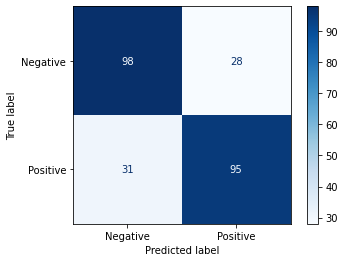

In [ ]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X_test2, y_test, display_labels=['Negative', 'Positive'],cmap=plt.cm.Blues,normalize=None)

In [ ]:
# Calculate precision, recall and f-measure scores

TN = 98
FP = 28
FN = 31
TP = 95

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f = 2*(precision*recall)/(precision+recall)

print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F-measure: {}".format(f))

Precision: 0.7723577235772358
Recall: 0.753968253968254
F-measure: 0.7630522088353413
